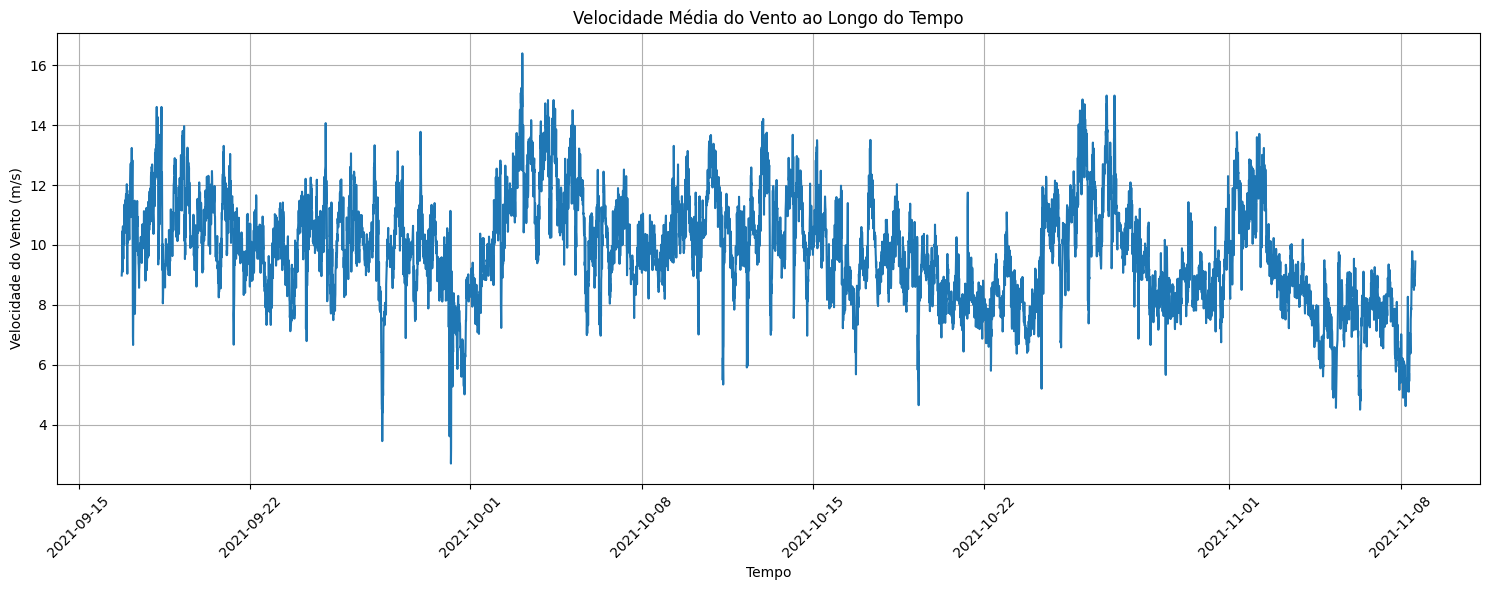

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7561 entries, 2021-09-16 18:00:00 to 2021-11-08 14:29:59.999997
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wind_speed  7561 non-null   float64
dtypes: float64(1)
memory usage: 118.1 KB


In [184]:
from model import dataSetModel
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

DataSet = dataSetModel.DataSet

data = DataSet.getData(DataSet)

df = pd.DataFrame(data, columns=['time', 'wind_speed'])
df.set_index('time', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['wind_speed'], linestyle='-')
plt.title('Velocidade Média do Vento ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df.info()

In [185]:
train_data, test_data = df['wind_speed'][:int(len(df)*0.8)], df['wind_speed'][int(len(df)*0.5):]

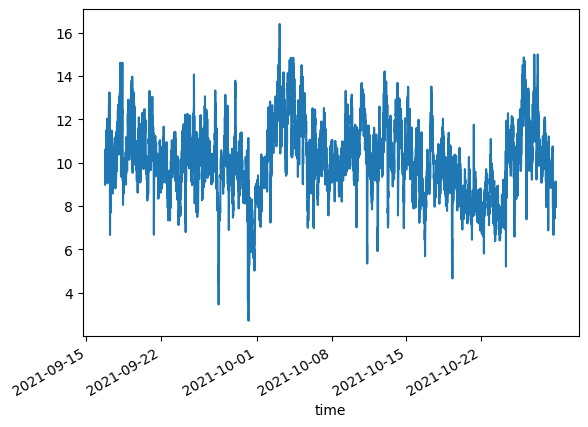

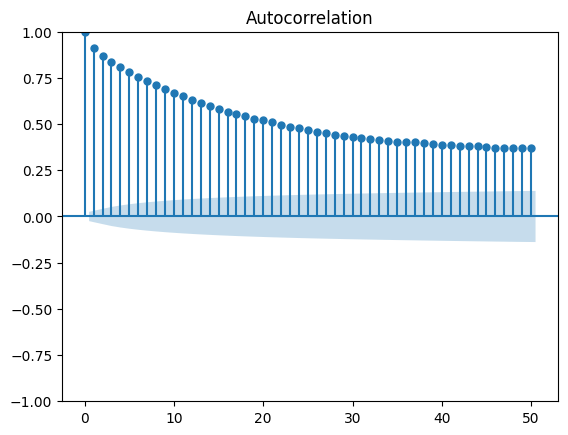

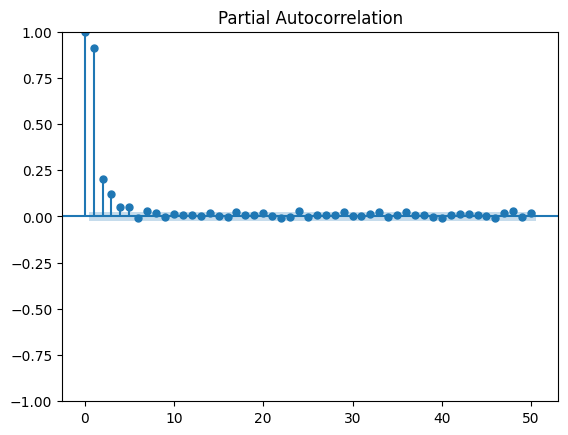

p-value: 1.47811697869932e-16


In [186]:
from statsmodels.tsa.stattools import adfuller

train_data.plot()

acf_original = plot_acf(train_data, lags= 50)
pacf_original = plot_pacf(train_data, lags= 50)
plt.show()

adf_test = adfuller(train_data)
print(f'p-value: {adf_test[1]}')

In [187]:
# train_data_diff_1 = train_data.diff().dropna()
# train_data_diff_1.plot()

# acf_original = plot_acf(train_data_diff_1)
# pacf_original = plot_pacf(train_data_diff_1)
# plt.show()

# adf_test = adfuller(train_data_diff_1)
# print(f'p-value: {adf_test[1]}')


In [188]:
# train_data_diff_2 = train_data.diff().dropna().dropna()
# train_data_diff_2.plot()

# acf_original = plot_acf(train_data_diff_2)
# pacf_original = plot_pacf(train_data_diff_2)
# plt.show()

# adf_test = adfuller(train_data_diff_2)
# print(f'p-value: {adf_test[1]}')

In [189]:
model = ARIMA(train_data, order=(4, 1, 2))
model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test_data))

/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregres

                               SARIMAX Results                                
Dep. Variable:             wind_speed   No. Observations:                 6048
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -5886.573
Date:                Mon, 19 Aug 2024   AIC                          11787.146
Time:                        16:25:21   BIC                          11834.097
Sample:                             0   HQIC                         11803.444
                               - 6048                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2300      0.704     -0.326      0.744      -1.611       1.151
ar.L2          0.7260      0.480      1.514      0.130      -0.214       1.666
ar.L3          0.1985      0.072      2.756      0.0

/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


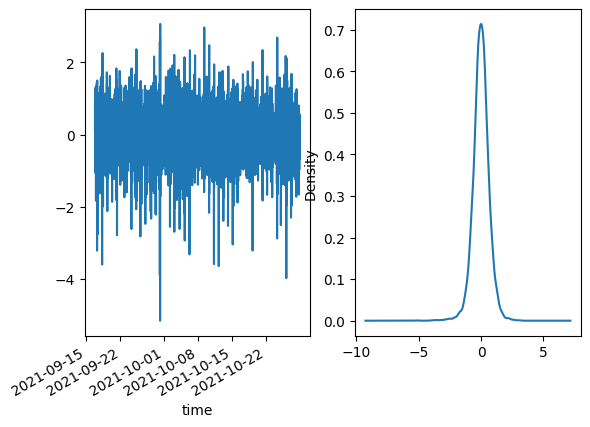

In [190]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(ax=ax[0])
residuals.plot(kind = 'kde', ax=ax[1])
plt.show()

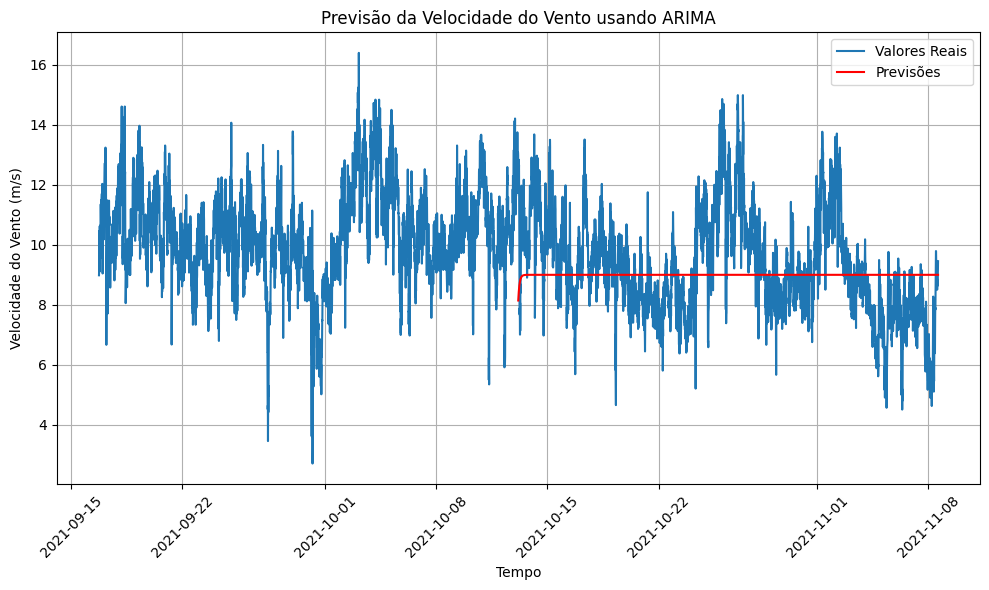

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['wind_speed'], label='Valores Reais')
plt.plot(test_data.index, forecast, label='Previsões', color='red')
plt.title('Previsão da Velocidade do Vento usando ARIMA')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lucas/Projetos/TFG-Vento-Sul/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Pred

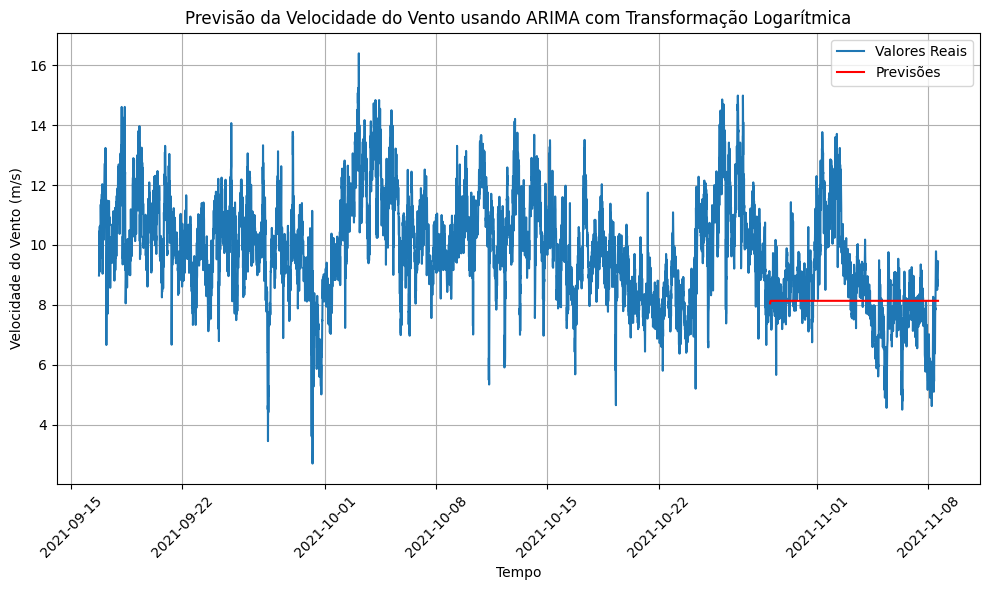

In [192]:
# Transformar os dados usando o logaritmo
df['log_wind_speed'] = np.log(df['wind_speed'])

# Dividir os dados transformados em treino e teste
train_data, test_data = df['log_wind_speed'][:int(len(df)*0.8)], df['log_wind_speed'][int(len(df)*0.8):]

# Ajustar o modelo ARIMA
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Fazer previsões
forecast_log = model_fit.forecast(steps=len(test_data))

# Reverter a transformação logarítmica
forecast = np.exp(forecast_log)

# Visualizar previsões e valores reais
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['wind_speed'], label='Valores Reais')
plt.plot(test_data.index, forecast, label='Previsões', color='red')
plt.title('Previsão da Velocidade do Vento usando ARIMA com Transformação Logarítmica')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

ADF Statistic: -8.9453385895625
p-value: 9.020505589928352e-15


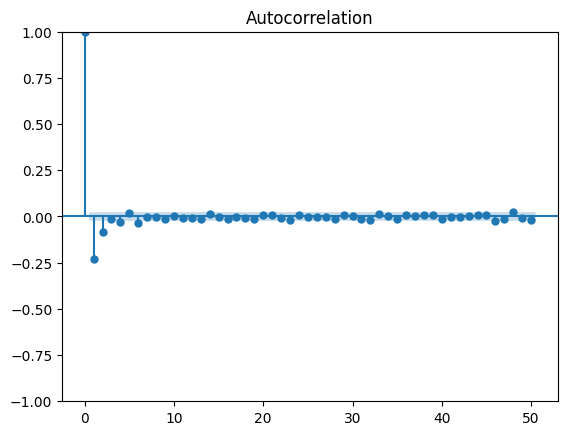

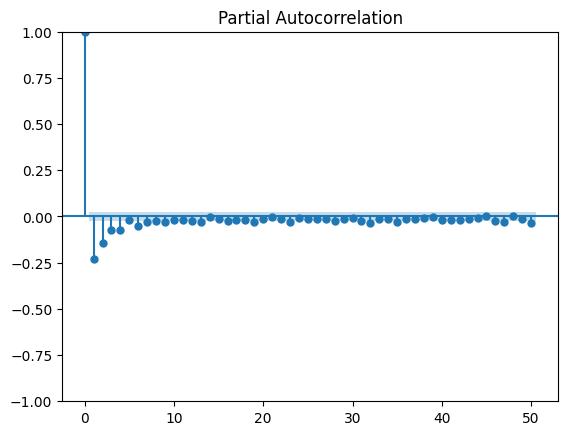

Best ARIMA order: None
Best AIC: inf


AttributeError: 'NoneType' object has no attribute 'forecast'

In [193]:
df = pd.DataFrame(data, columns=['time', 'wind_speed'])
df.set_index('time', inplace=True)

result = adfuller(df['wind_speed'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

df['wind_speed_diff'] = df['wind_speed'].diff().dropna()

plot_acf(df['wind_speed_diff'].dropna(), lags=50)
plot_pacf(df['wind_speed_diff'].dropna(), lags=50)
plt.show()

train_data, test_data = df['wind_speed'][:int(len(df)*0.8)].index.values, df['wind_speed'][int(len(df)*0.8):].index.values

p = range(0, 6)
d = range(0, 2)
q = range(0, 6)

best_aic = np.inf
best_order = None
best_model = None

for i in p:
    for j in d:
        for k in q:
            try:
                model = ARIMA(train_data, order=(i, j, k))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (i, j, k)
                    best_model = model_fit
            except:
                continue

print('Best ARIMA order:', best_order)
print('Best AIC:', best_aic)

# Fazer previsões
forecast = best_model.forecast(steps=len(test_data))

# Visualizar previsões e valores reais
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['wind_speed'], label='Valores Reais')
plt.plot(test_data.index, forecast, label='Previsões', color='red')
plt.title('Previsão da Velocidade do Vento usando ARIMA')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()